In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [3]:
CDF = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
CDF

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('Income') data type indicates that dependent variable data is categorical in nature.

In [4]:
CDF.shape 

(32560, 15)

Checking for null/missing 

In [6]:
CDF.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values

Checking for unique elements

In [8]:
CDF.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Statistical Summary

In [9]:
CDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
CDF.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Mean and 50% in continuous and discrete columns are similar indicating a somewhat normal distribution in Age column. A higher std in Capital_gain, Capital_loss and std being close to mean in case of Fnlwgt indicate skewness in their respecive data distributions.

In [11]:
(CDF==' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [12]:
CDF.replace({' ?': np.nan}, inplace=True) #converting ' ?' to NaN values

In [13]:
CDF.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [14]:
CDF.isnull().sum() #Checking for null values

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Checking for unique categories in the categorical columns with null values

In [15]:
CDF.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

<Axes: xlabel='Workclass', ylabel='count'>

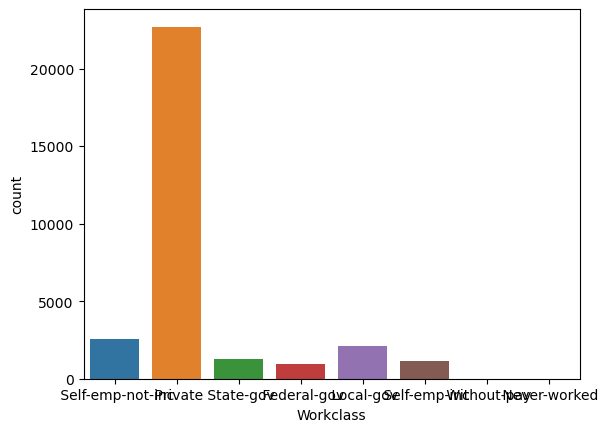

In [17]:
sns.countplot(x='Workclass', data=CDF)

In [18]:
CDF.Workclass.mode()

0     Private
Name: Workclass, dtype: object

In [19]:
CDF.Workclass.isnull().sum()/32560*100

5.638820638820639

5.63% of Workclass data is NaN

In [20]:
(CDF['Workclass'] == ' Private').sum()/CDF.Workclass.count()*100 #checking the % share of most frequently occuring value.

73.87058976695742

73.87% of Workclass data is ' Private'.

Therefore imputing 'Private' to NaN values in Workclass column

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )CDF[['Workclass']].isnull().sum()

In [23]:
si = si.fit(CDF[['Workclass']])

In [24]:
CDF[['Workclass']] = si.transform(CDF[['Workclass']])

CDF[['Workclass']].isnull().sum()

There are no more null values in 'Workclass' column

In [28]:
CDF.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

<Axes: xlabel='Native_country', ylabel='count'>

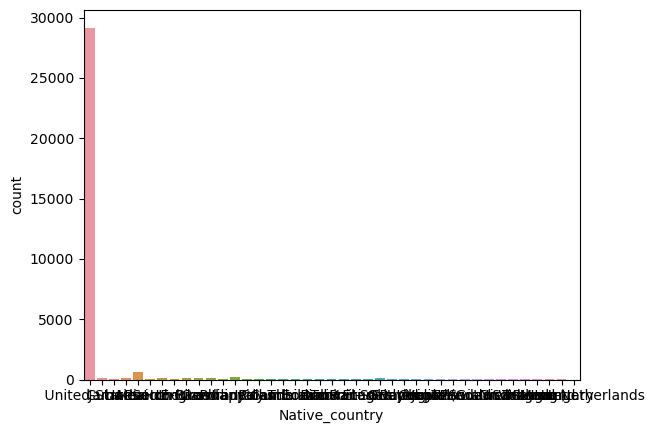

In [30]:
sns.countplot(x='Native_country', data=CDF)

In [31]:
CDF.Native_country.mode() #the most frequently occuring value

0     United-States
Name: Native_country, dtype: object

In [32]:
CDF.Native_country.isnull().sum()/32560*100

1.7905405405405406

1.79% of Native_country data is NaN.

In [34]:
(CDF['Native_country'] == ' United-States').sum()/CDF.Native_country.count()*100 #checking the % share of most frequently occuring value

91.21868843231073

Therefore imputing ' United-States' to NaN values in Native_country column

In [35]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [36]:
si = si.fit(CDF[['Native_country']])

In [37]:
CDF[['Native_country']] = si.transform(CDF[['Native_country']])

In [38]:
CDF[['Native_country']].isnull().sum()

Native_country    0
dtype: int64

There are no more null values in 'Workclass' column.

In [39]:
CDF.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

<Axes: xlabel='Occupation', ylabel='count'>

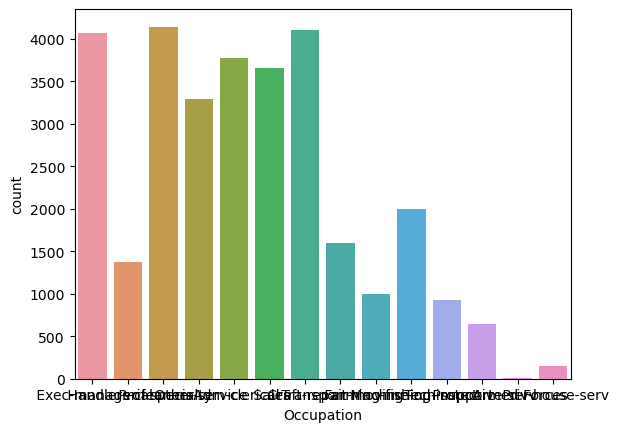

In [43]:
sns.countplot(x='Occupation', data=CDF)

In [44]:
CDF.Occupation.mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [45]:
CDF.Occupation.isnull().sum()/32560*100

5.66031941031941

5.66% of Occupation data is NaN.

In [46]:
(CDF['Occupation'] == ' Prof-specialty').sum()/CDF.Occupation.count()*100 #checking the % share of most frequently occuring value.

13.477878699091708

In this case, it is best to drop all the respective rows which contain 'NaN' values under Occupation Column

In [47]:
CDF.isnull().sum()

Age                  0
Workclass            0
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

In [48]:
CDF.dropna(inplace=True)

In [49]:
CDF.shape

(30717, 15)

In [50]:
CDF.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [51]:
CDF

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('Income') data type indicates that dependent variable data is categorical in nature.

Statistical Summary

In [52]:
CDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30717 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30717 non-null  int64 
 1   Workclass       30717 non-null  object
 2   Fnlwgt          30717 non-null  int64 
 3   Education       30717 non-null  object
 4   Education_num   30717 non-null  int64 
 5   Marital_status  30717 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    30717 non-null  object
 8   Race            30717 non-null  object
 9   Sex             30717 non-null  object
 10  Capital_gain    30717 non-null  int64 
 11  Capital_loss    30717 non-null  int64 
 12  Hours_per_week  30717 non-null  int64 
 13  Native_country  30717 non-null  object
 14  Income          30717 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [53]:
CDF.dtypes[CDF.dtypes == 'object'] #Identifying the Categorical Columns

Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

In [54]:
CDF.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30717.000000,3.071700e+04,30717.000000,30717.000000,30717.000000,30717.000000
mean,38.443565,1.898492e+05,10.130221,1106.002311,88.913110,40.949344
std,13.118441,1.054581e+05,2.562458,7497.982938,405.663489,11.985576
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Mean and 50% in continuous and discrete columns are similar indicating a somewhat normal distribution in Age column. A higher std in Capital_gain, Capital_loss and std being close to mean in case of Fnlwgt indicate skewness in their respecive data distributions.

In [57]:
CDF.skew()

Age                0.531692
Fnlwgt             1.457202
Education_num     -0.310305
Capital_gain      11.785715
Capital_loss       4.514245
Hours_per_week     0.331806
dtype: float64

<Axes: xlabel='Education_num', ylabel='Density'>

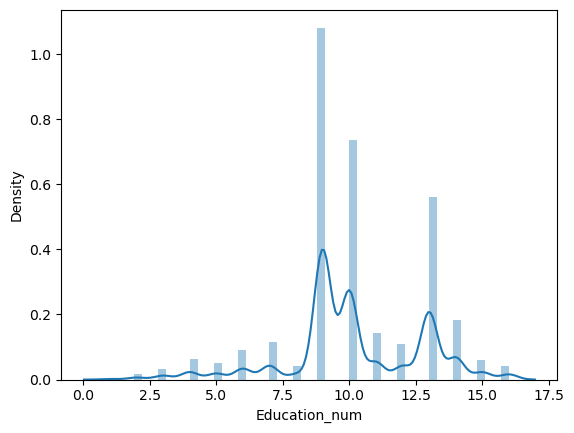

In [58]:
sns.distplot(CDF.Education_num)

This is a Classification Problem since the Target variable / Label column ("Income") has Catergorical type of Data.

Analysing the Target Class

In [60]:
CDF['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are 2 unique catergorical values in the Label column / target variable.

In [61]:
CDF['Income'].value_counts()

 <=50K    23067
 >50K      7650
Name: Income, dtype: int64

<Axes: xlabel='Income', ylabel='count'>

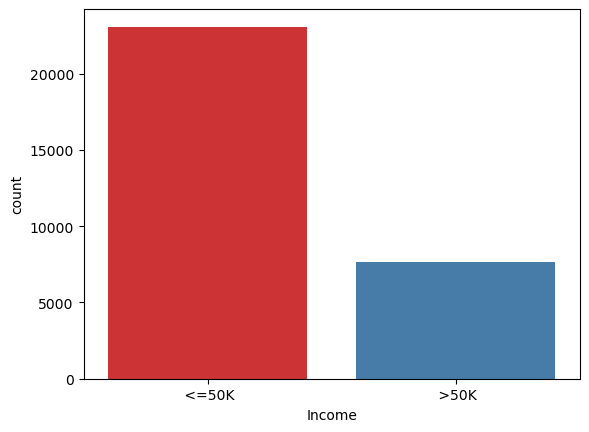

In [63]:
sns.countplot(x='Income', data=CDF, palette="Set1")

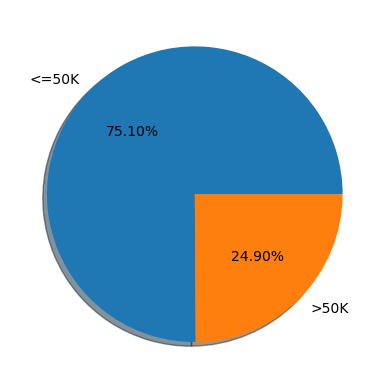

In [64]:
labels = '<=50K','>50K'
fig, ax = plt.subplots()
ax.pie(CDF['Income'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class '50K' : Has 75.10% of total values

'>50K' : Has 24.90% of total values

Classes are imbalanced.

Analysing Feature columns Catergorical Classes

In [65]:
CDF.dtypes[CDF.dtypes == 'object'] #Identifying the Categorical Columns

Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

In [66]:
CDF['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: Workclass, dtype: int64

<Axes: xlabel='Workclass', ylabel='count'>

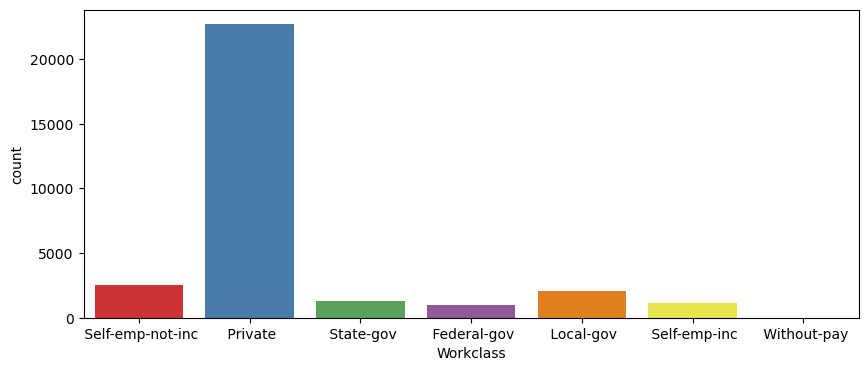

In [68]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(x='Workclass', data=CDF, palette="Set1")

Majority of the people belong to Private Workclass.

In [69]:
CDF['Education'].value_counts()

 HS-grad         9968
 Some-college    6775
 Bachelors       5181
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1020
 10th             831
 7th-8th          573
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

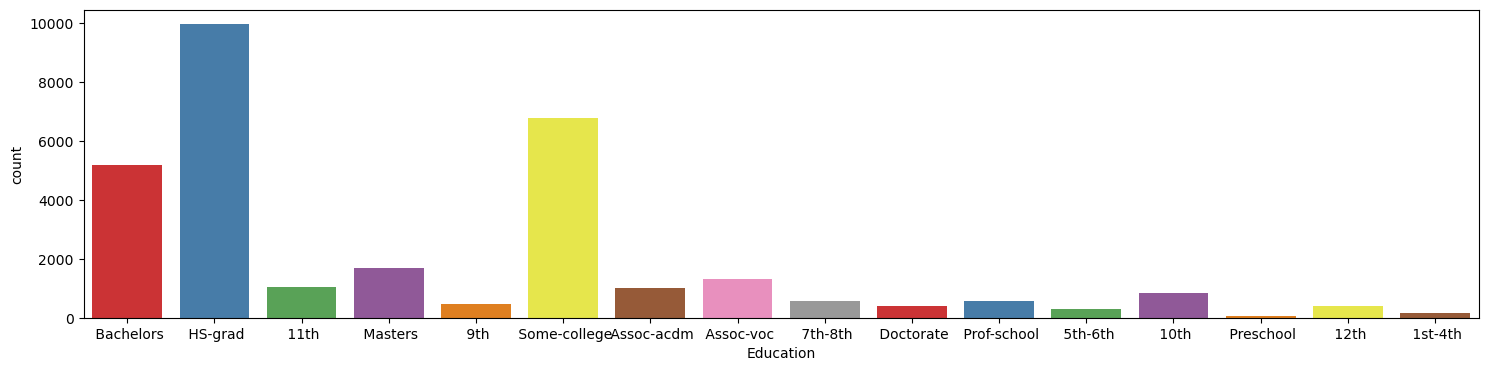

In [71]:
plt.figure(figsize=(18,4),facecolor='white')
sns.countplot(x='Education', data=CDF, palette="Set1")

Majority of people are High scool graduates followed by Bachelors and those having attended some college.

In [72]:
CDF['Marital_status'].value_counts()

 Married-civ-spouse       14339
 Never-married             9911
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

<Axes: xlabel='Marital_status', ylabel='count'>

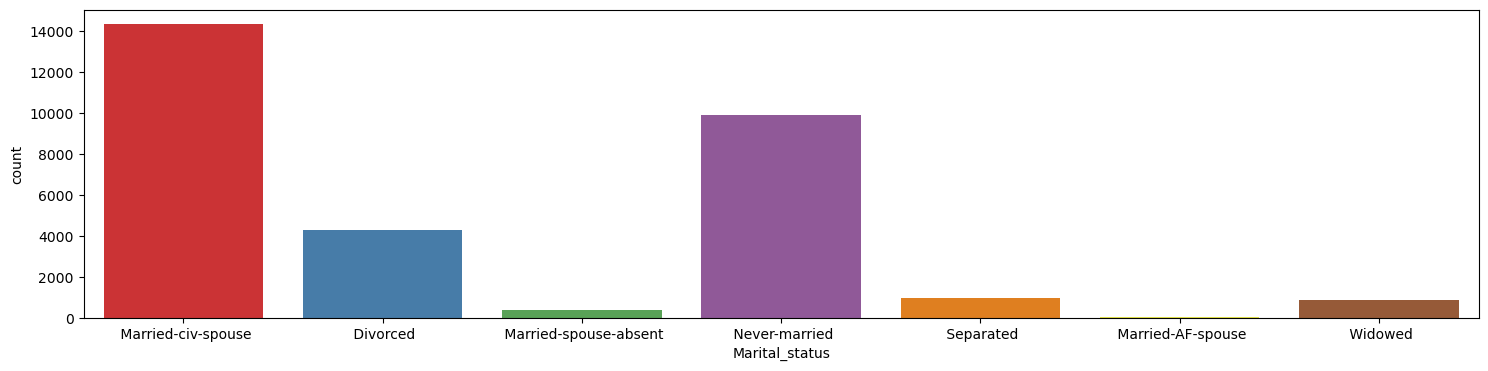

In [74]:
plt.figure(figsize=(18,4),facecolor='white')
sns.countplot(x='Marital_status', data=CDF, palette="Set1")

Majority of the people are Married, followed by those who have never married.

In [76]:
CDF['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

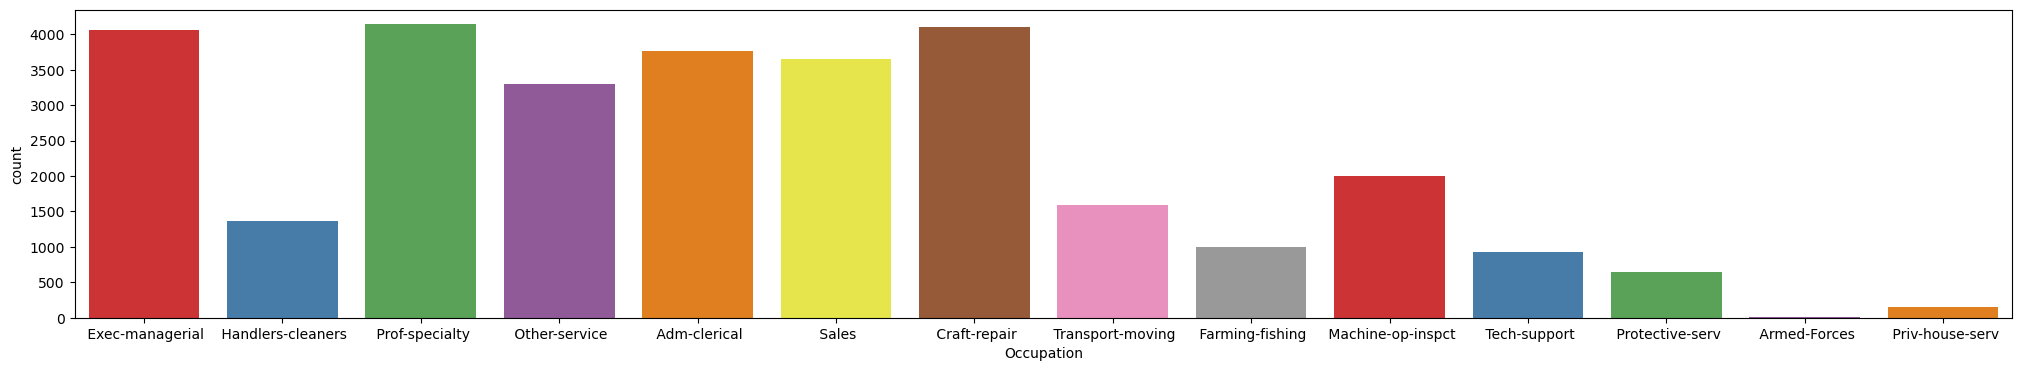

In [78]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(x='Occupation', data=CDF, palette="Set1")

Exec-manegerial,Prof-speciality,Other-service,Adm-clerical,sales and Craft-repair are most common occupations.

In [79]:
CDF['Relationship'].value_counts()

 Husband           12704
 Not-in-family      7864
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: Relationship, dtype: int64

<Axes: xlabel='Relationship', ylabel='count'>

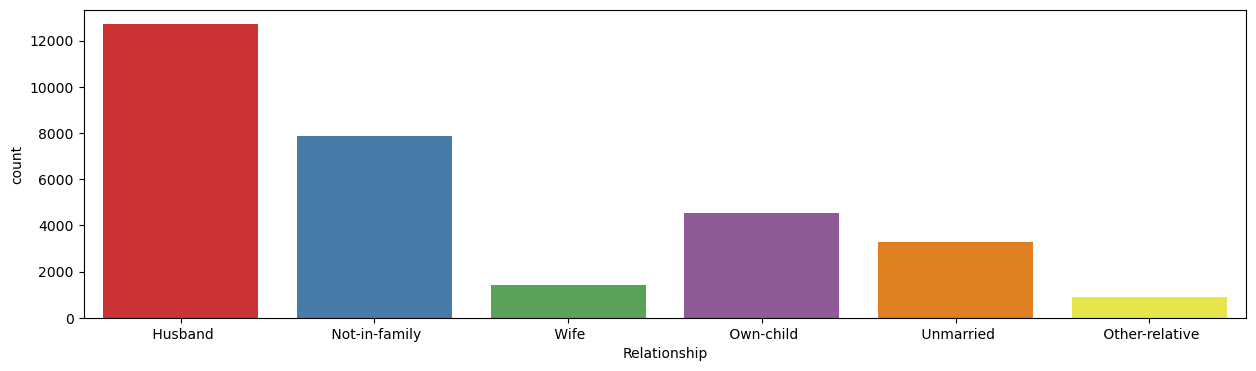

In [80]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(x='Relationship', data=CDF, palette="Set1")

In [81]:
CDF['Race'].value_counts()

 White                 26300
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: Race, dtype: int64

<Axes: xlabel='Race', ylabel='count'>

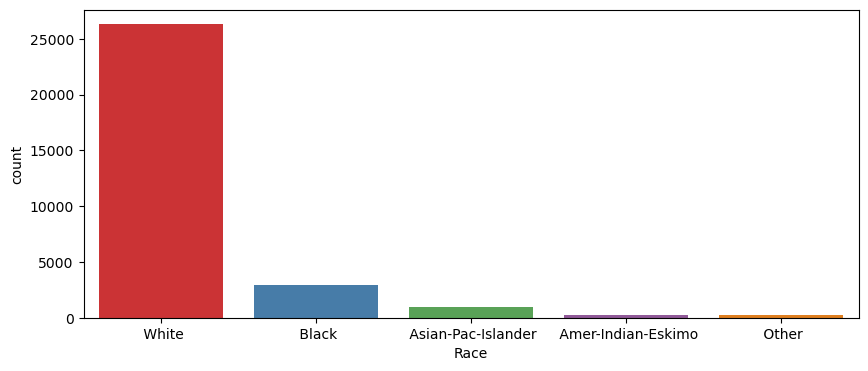

In [82]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(x='Race', data=CDF, palette="Set1")

Whites form the majority.

In [83]:
CDF['Sex'].value_counts()

 Male      20787
 Female     9930
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

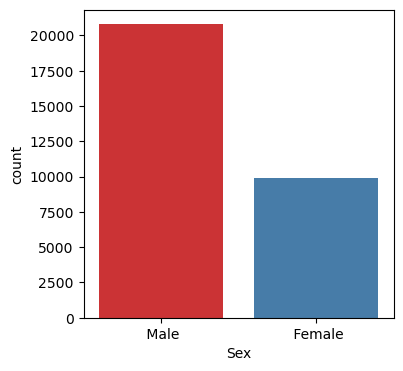

In [84]:
plt.figure(figsize=(4,4),facecolor='white')
sns.countplot(x='Sex', data=CDF, palette="Set1")

In [85]:
CDF['Native_country'].value_counts()

 United-States                 28059
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

<Axes: xlabel='Native_country', ylabel='count'>

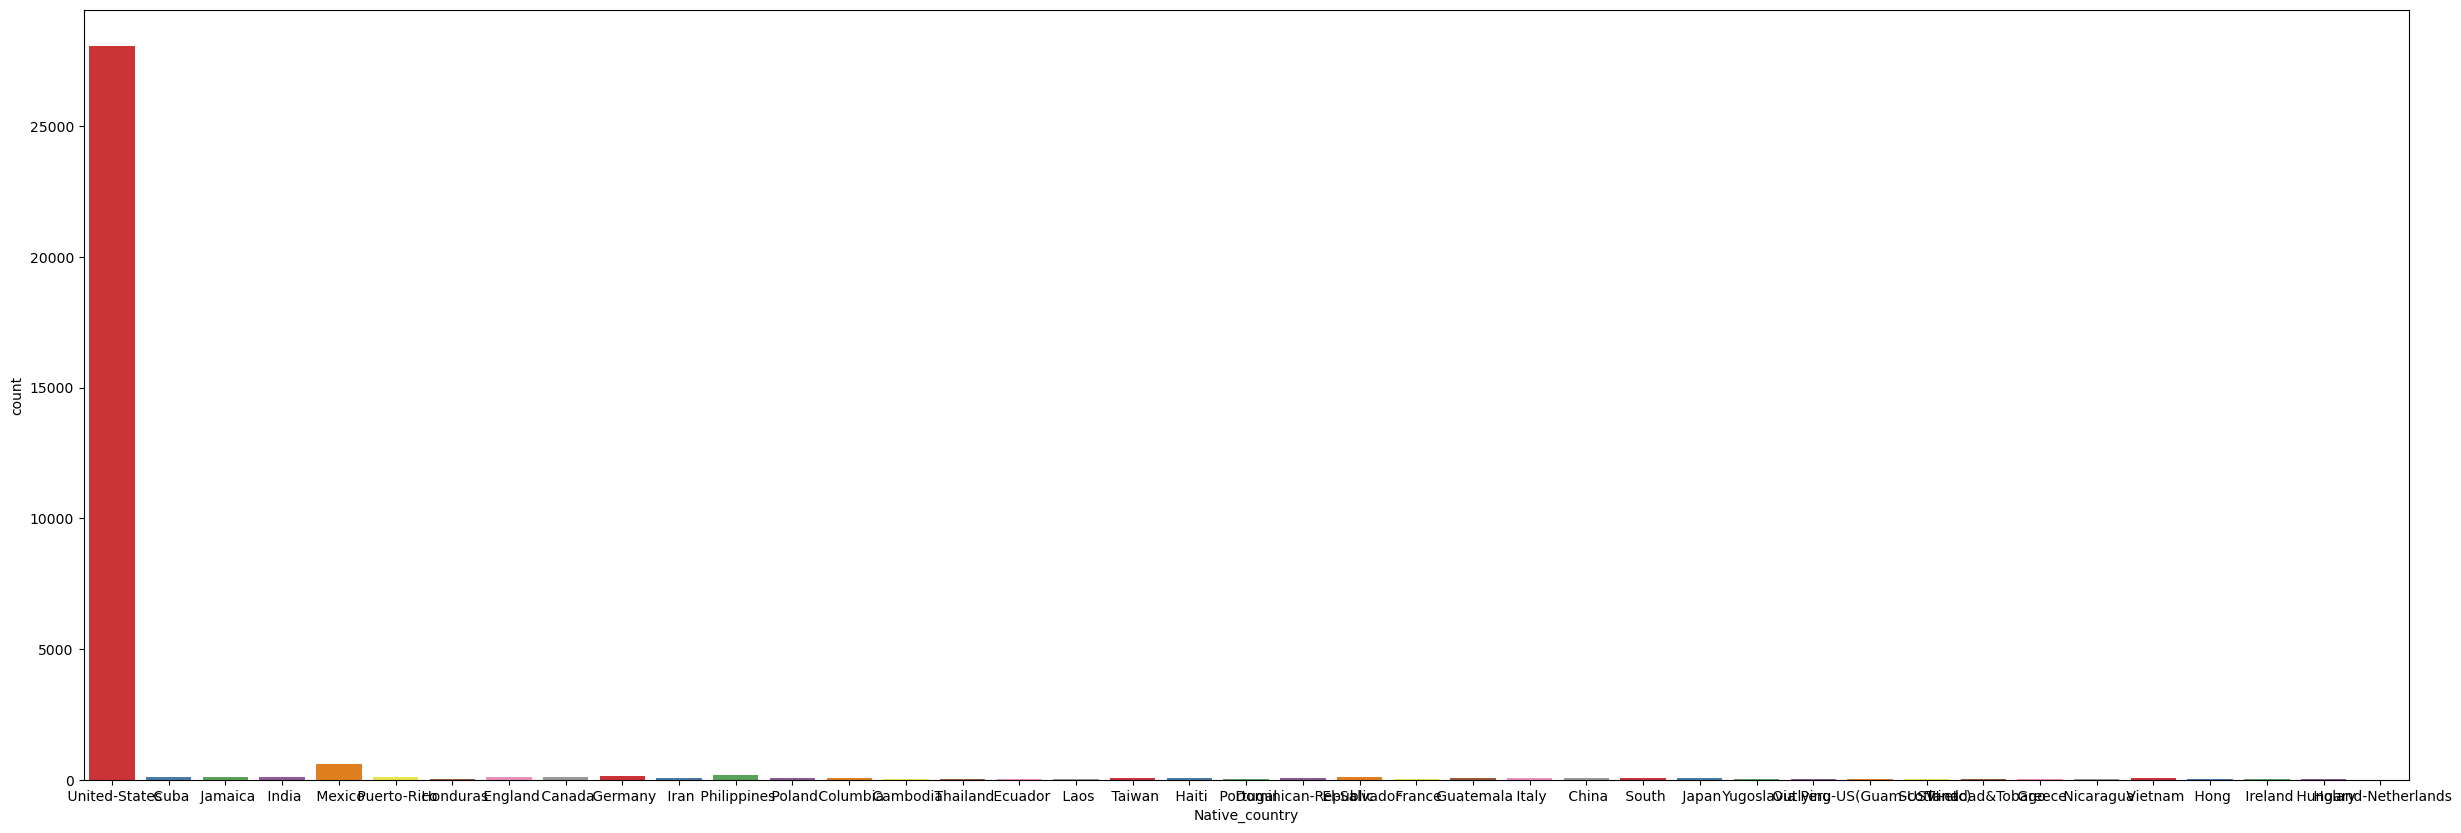

In [87]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(x='Native_country', data=CDF, palette="Set1")

Analysing Feature columns with Continuous Data.

In [88]:
CDF.dtypes[CDF.dtypes != 'object']#Identifying the Continuous/discrete Columns

Age               int64
Fnlwgt            int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
dtype: object

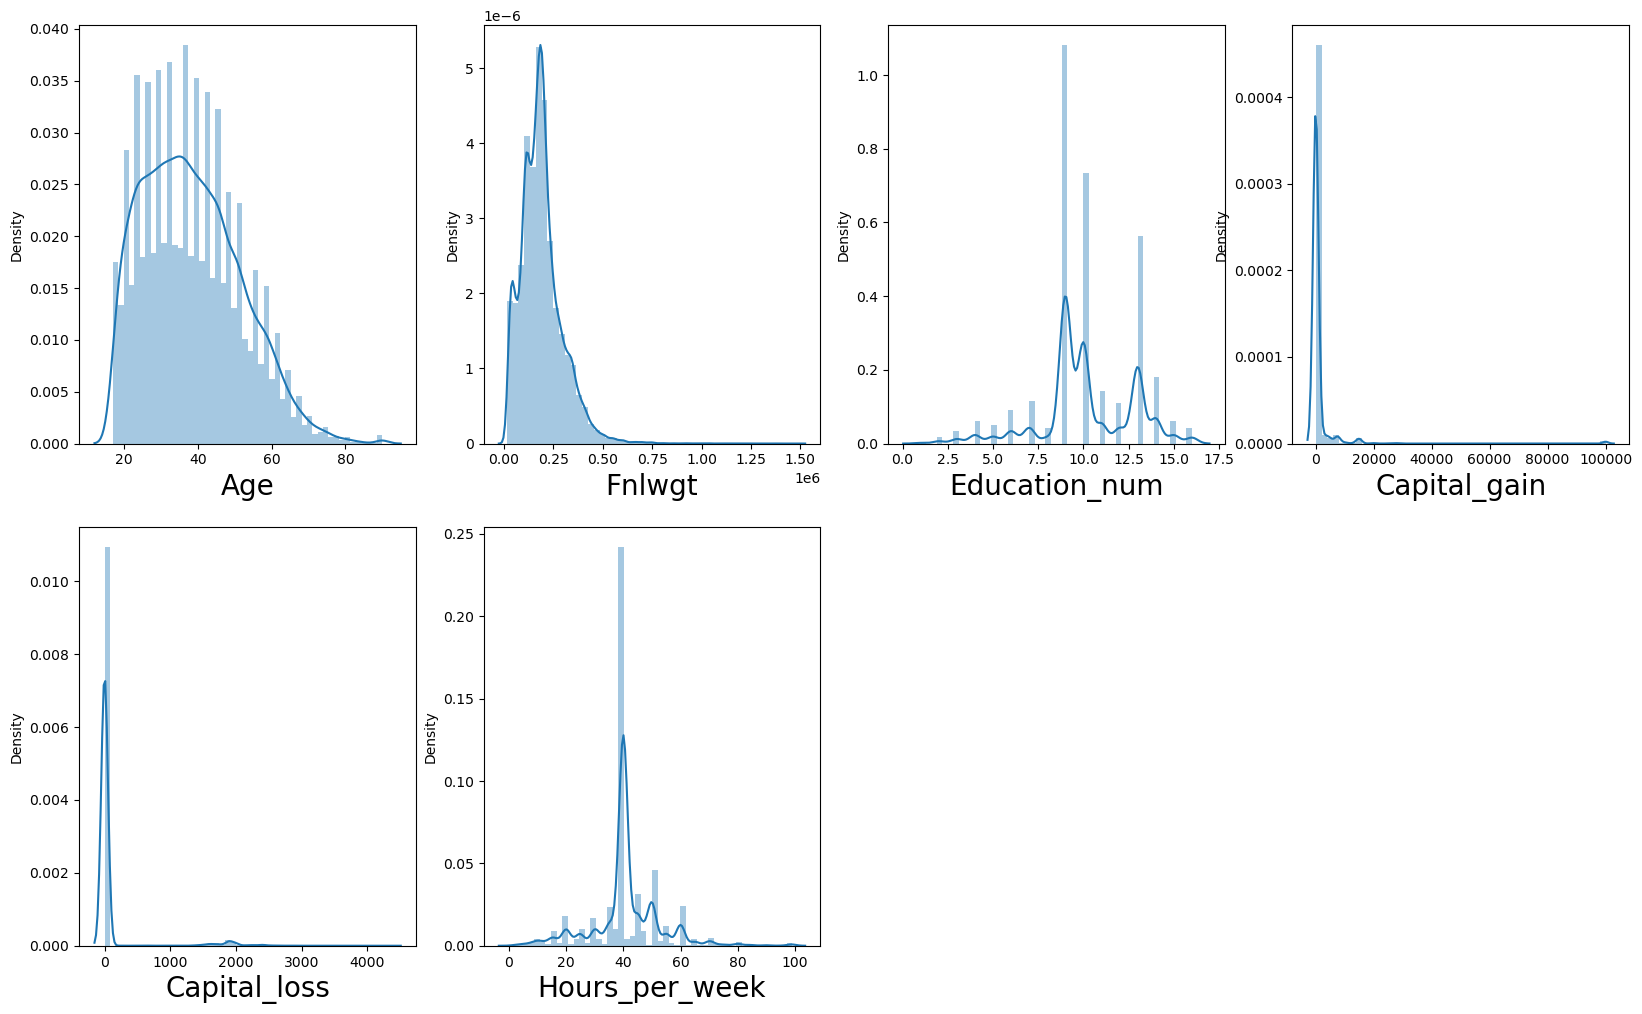

In [89]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in CDF[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(CDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [90]:
CDF[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].skew()

Age                0.531692
Fnlwgt             1.457202
Education_num     -0.310305
Capital_gain      11.785715
Capital_loss       4.514245
Hours_per_week     0.331806
dtype: float64

'Income' vs Continuous/Discrete Data Columns

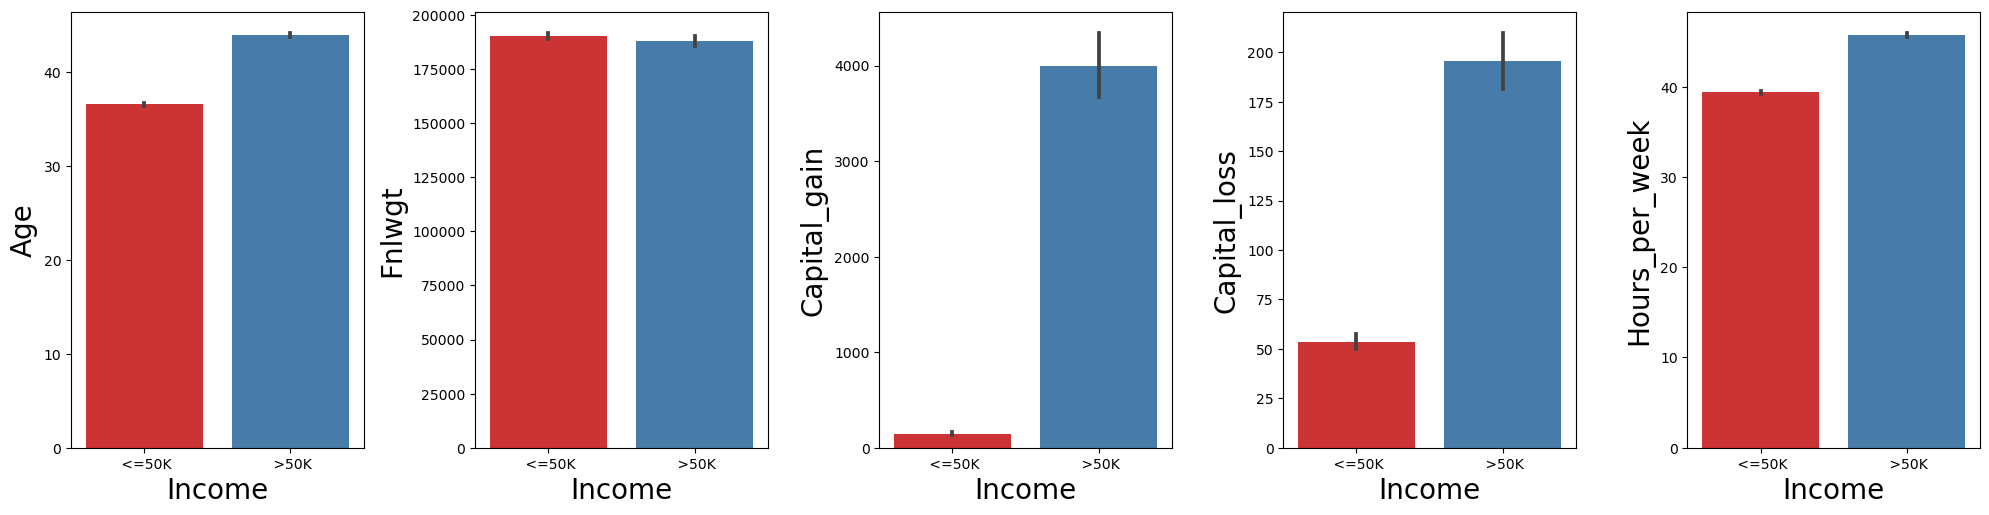

In [92]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnum = 1
y = 'Income'
X = CDF[['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]

for col in X.columns:
    if plotnum <= 15:
        plt.subplot(5, 5, plotnum)
        sns.barplot(x=y, y=col, data=CDF, palette="Set1")
        plt.xlabel('Income', fontsize=20)
        plt.ylabel(col, fontsize=20)
    plotnum += 1

plt.tight_layout()
plt.show()

Following observations can be made from above graphs:

Majority of people aged 35 and below that is, the younger population earns <=50k.

fnlwgt doesn't seem to impact income much.

Higher Education_num contributes to higher income >50k

Higher Capital Gain and Higher Capital Loss contribute to higher income >50k

People who work greater than 40 hours per week earn >50k

'Income' vs Categorical Data Columns

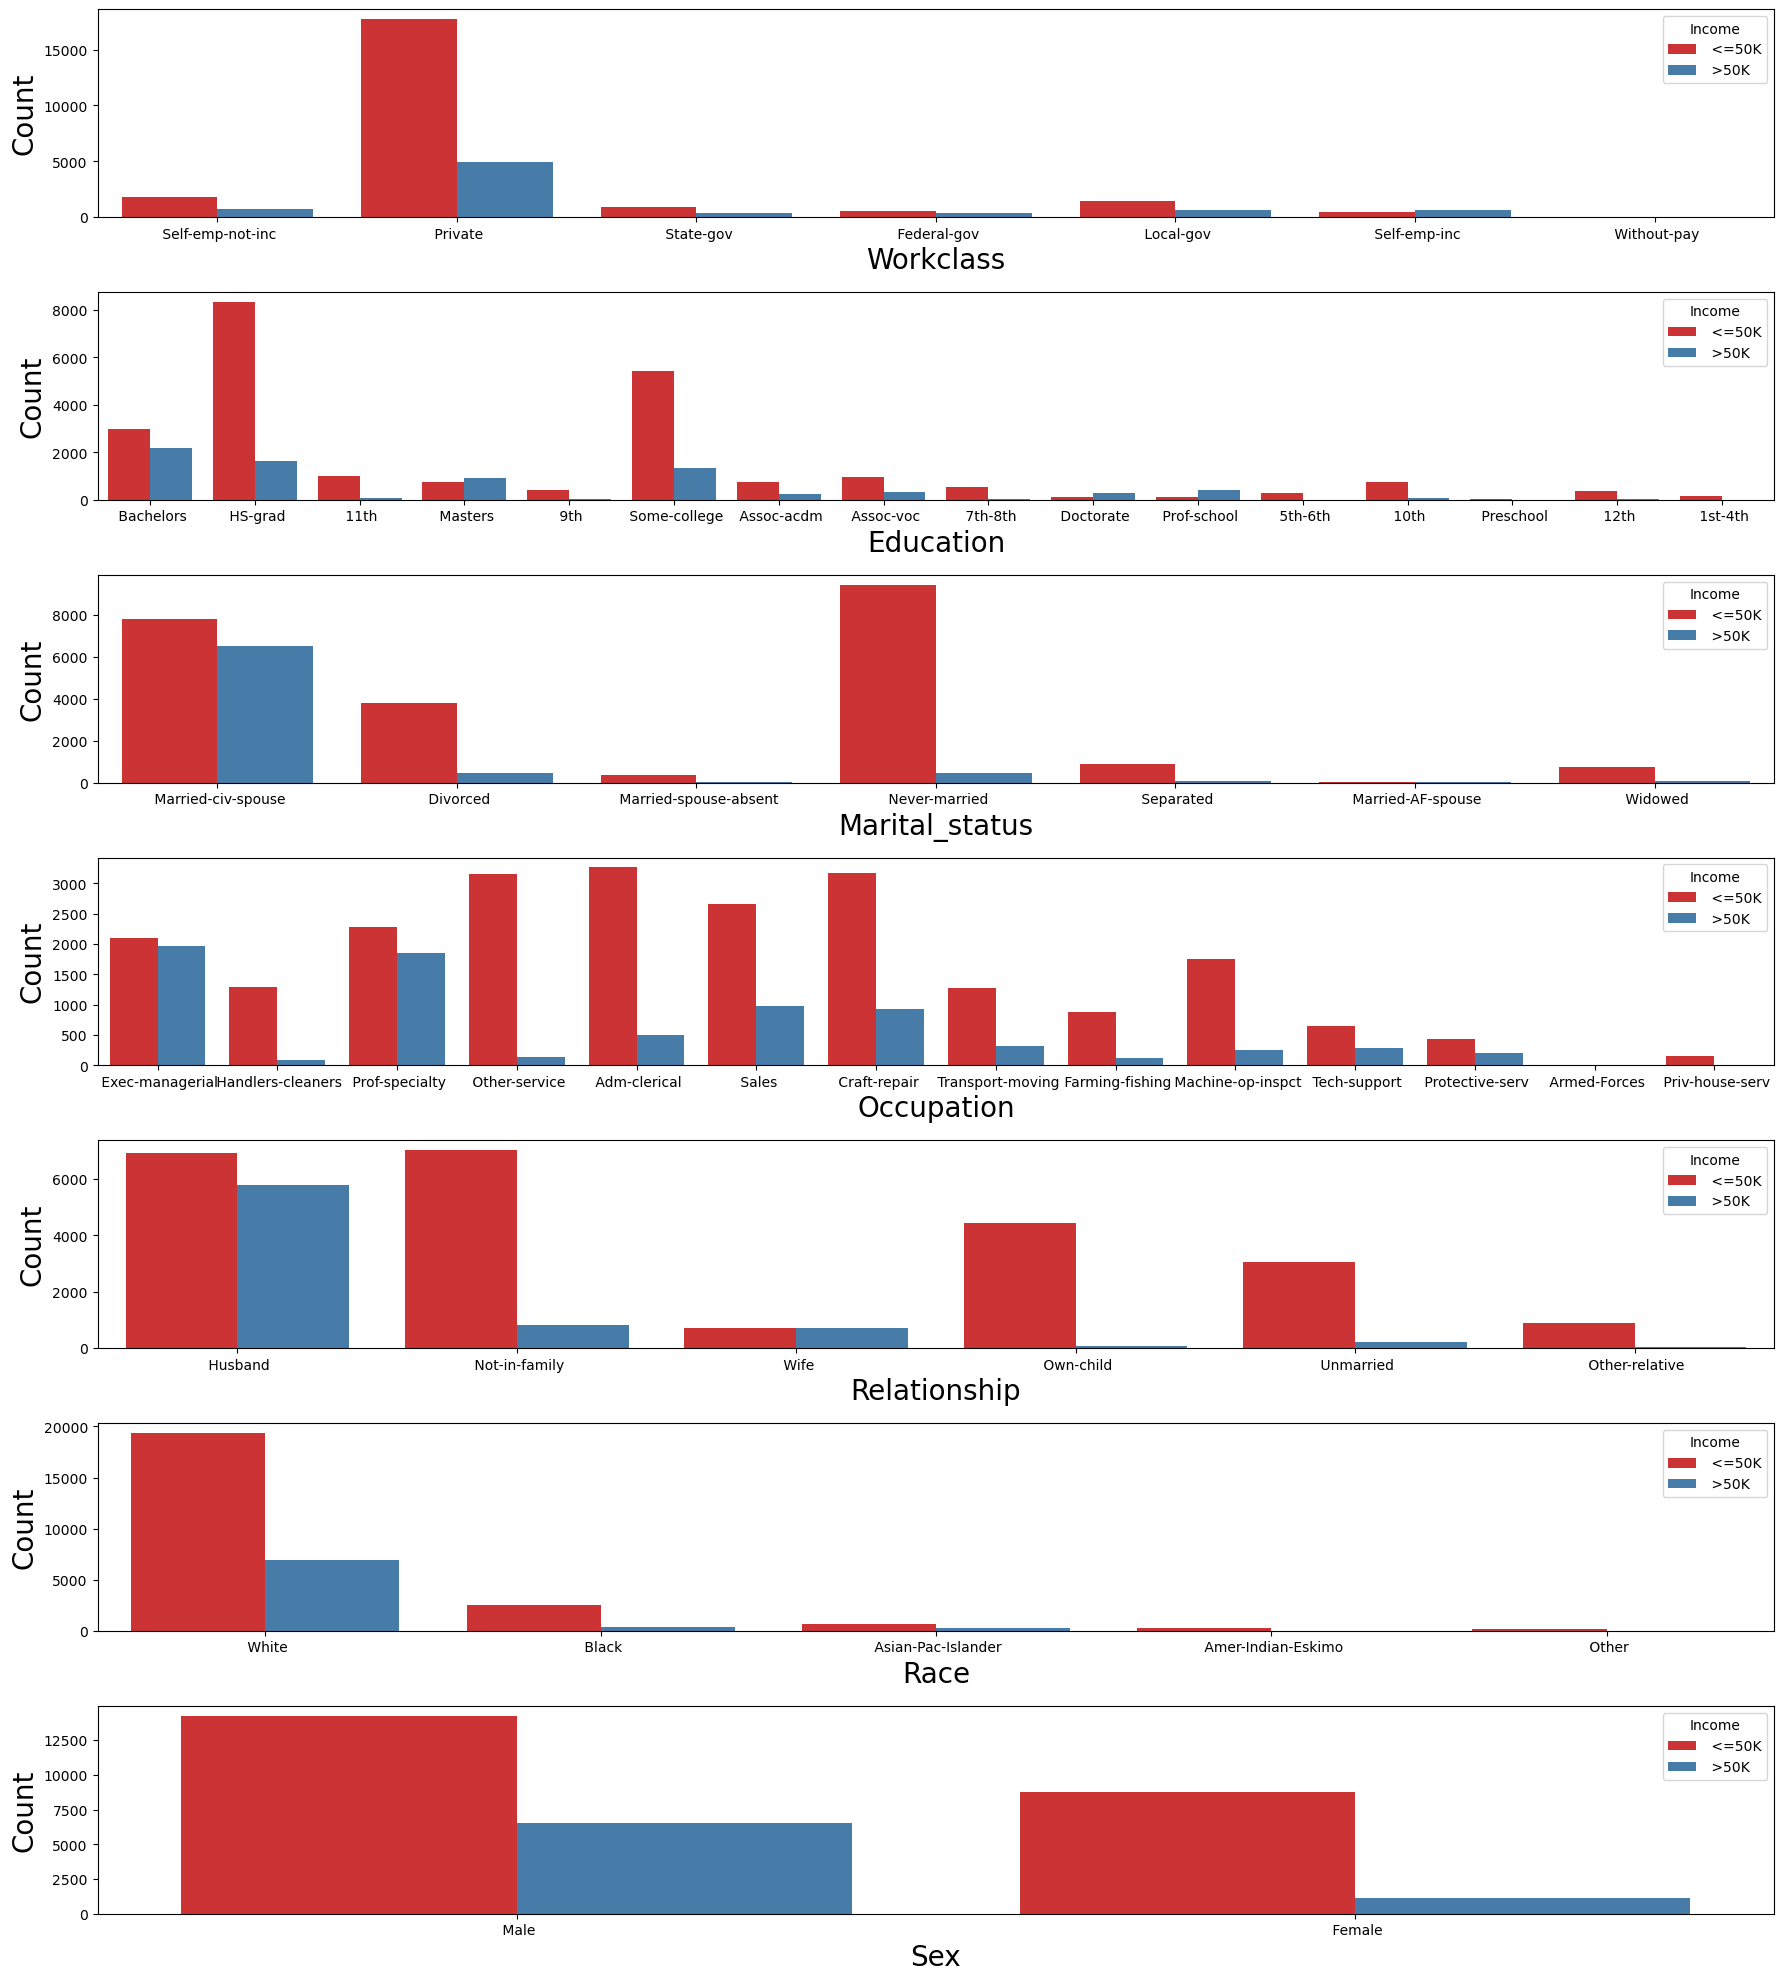

In [95]:
plt.figure(figsize=(18, 25), facecolor='white')
plotnum = 1
X = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex']

for col in X:
    if plotnum <= 23:
        plt.subplot(9, 1, plotnum)
        sns.countplot(x=col, hue='Income', data=CDF, palette="Set1")
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Count', fontsize=20)
    plotnum += 1

plt.tight_layout()
plt.show()

<Axes: xlabel='Native_country', ylabel='count'>

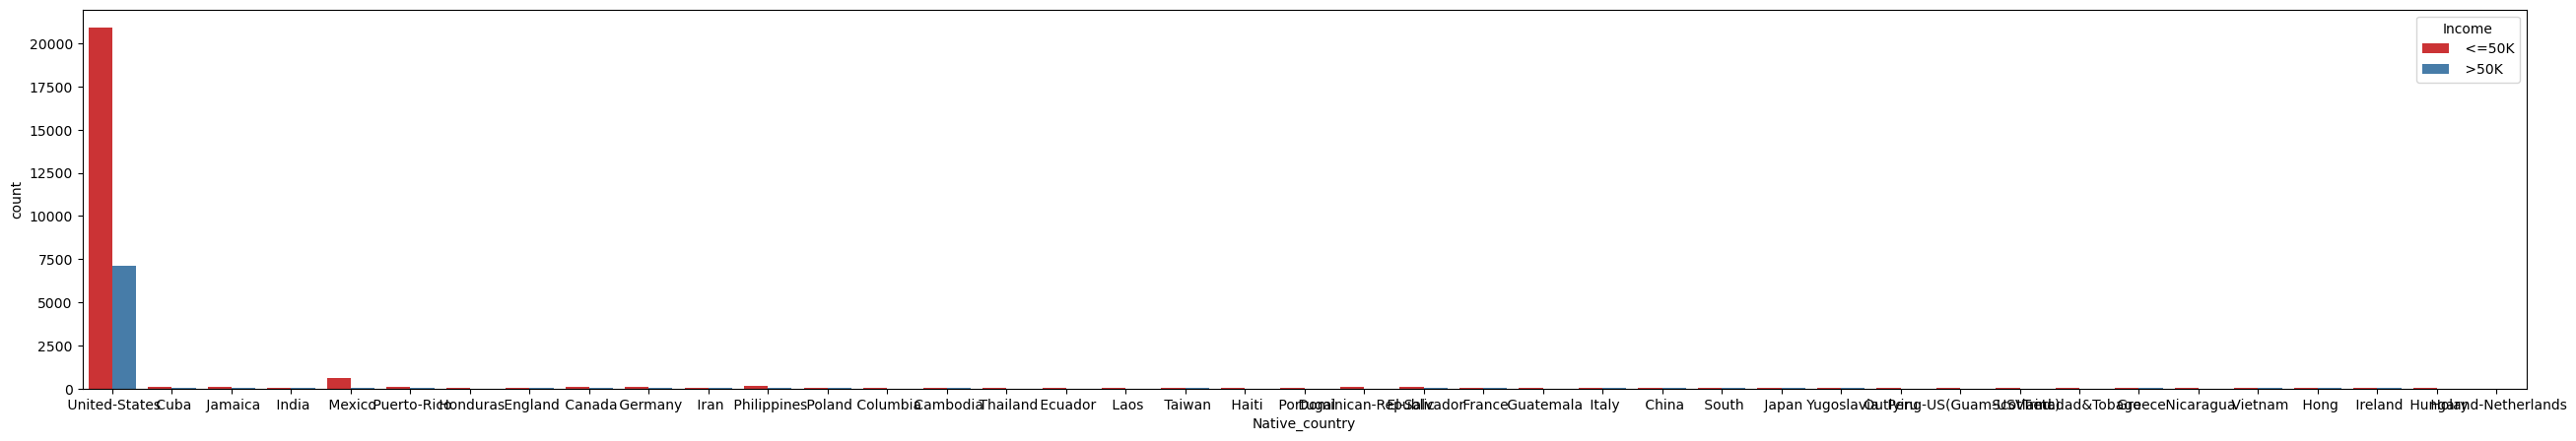

In [96]:
plt.figure(figsize=(32,5),facecolor='white')
sns.countplot(x='Native_country', hue='Income', data=CDF, palette="Set1")

Following observations can be made from above graphs:

People who belong to Private working class make more money than other working groups but are also more likely to earn <=50k.

People with lower education tend to make <=50k, while those with Doctorate,Prof-school,Masters,Bachelors degree or those who have atleast been to some college are more likely to earn >50k.

Higher Education_num contributes to higher income >50k

Divorced,separated,married but spouse absent,never married,widowed people are most likely to earn <=50k while people who earn >50k are mostly married.

Exce-managerial,Prof-speciality are the highest paying jobs, while craft-repair,transport-movingmMachine-op-inspct,tech-support,private house service,other services,adm-clerical, and sales mostly pay <=50k

Husbands make the highest amount, while those not in family mostly earn <=50k

Most people who make >50k are white, while most blacks and other minority races earn <=50k

Males earn more than females on average.

Income data is mostly available only for people, native to United States.

Checking for Outliers in columns with continuous distribution

In [97]:
X = CDF.drop(columns = ['Income'])
y = CDF['Income']

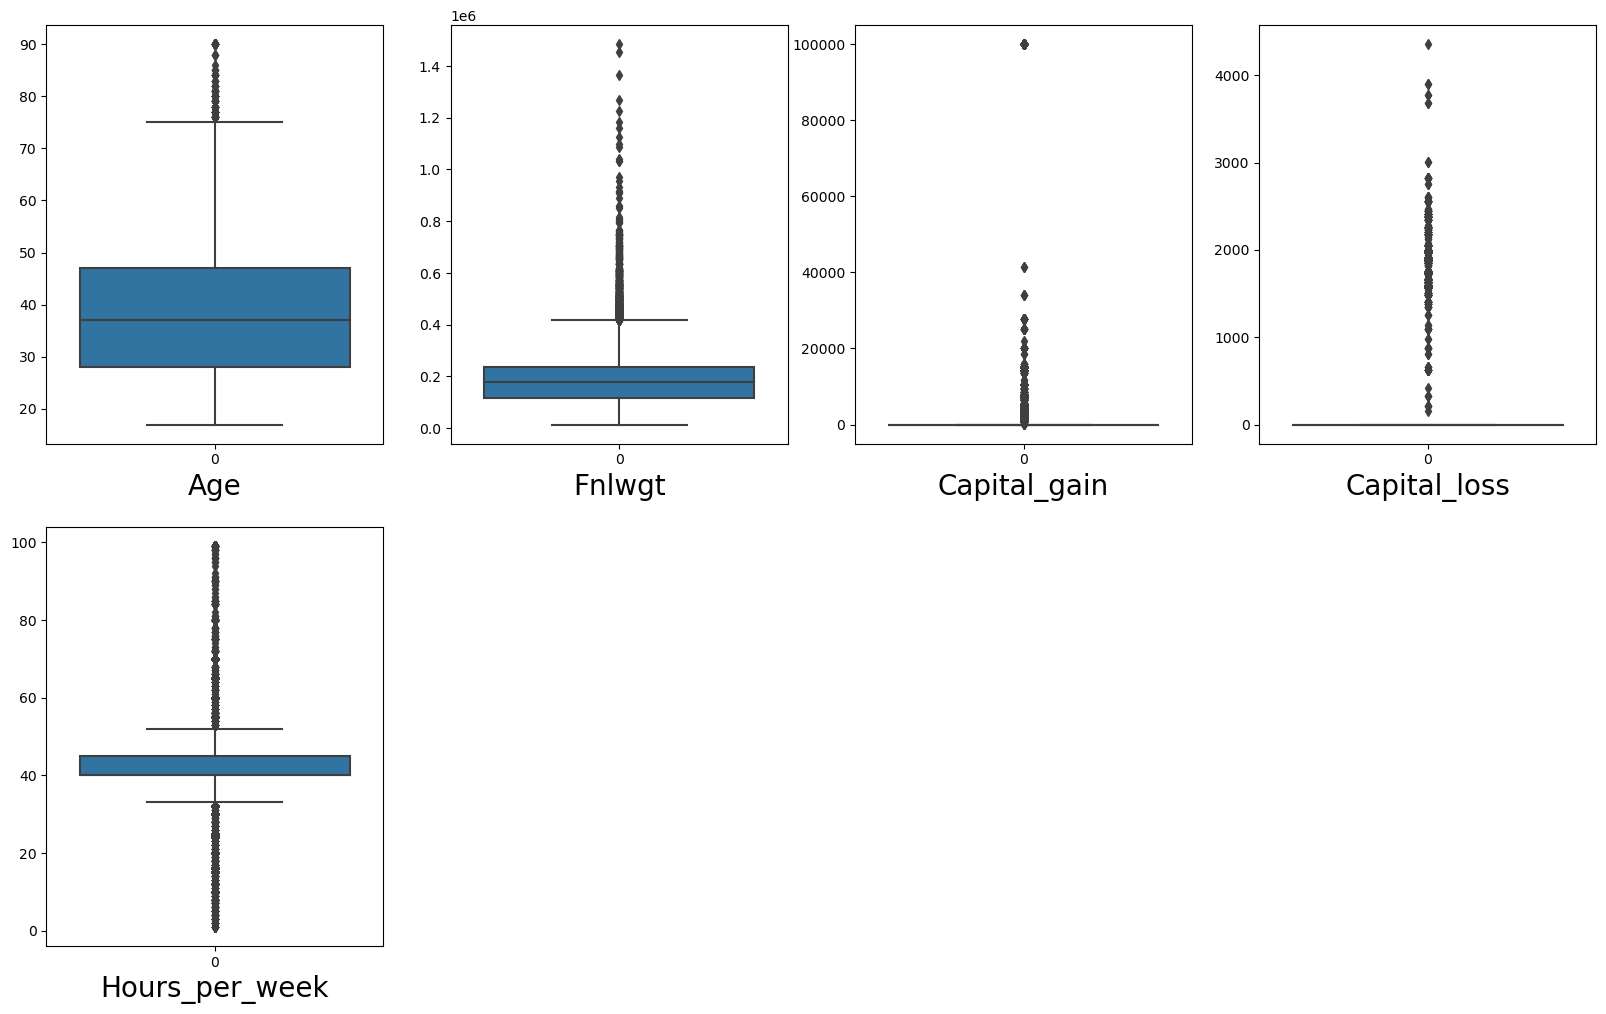

In [98]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns have a lot of outliers.

Removing Outliers using Z score Method

In [99]:
df2 = X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()

In [100]:
df2

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40
...,...,...,...,...,...
32555,27,257302,0,0,38
32556,40,154374,0,0,40
32557,58,151910,0,0,40
32558,22,201490,0,0,20


All columns have a lot of outliers.

Removing Outliers using Z score Method

In [101]:
df2 = X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()

In [102]:
df2

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40
...,...,...,...,...,...
32555,27,257302,0,0,38
32556,40,154374,0,0,40
32557,58,151910,0,0,40
32558,22,201490,0,0,20


In [103]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold valu

In [104]:
df3.shape

(28289, 5)

In [105]:
df2.shape

(30717, 5)

% Data loss 

In [106]:
loss=(30717-28289)/30717 * 100
loss

7.904417749129148

In [107]:
dropindx = X.index.difference(df3.index)

In [108]:
CDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [109]:
CDF.shape

(28289, 15)

In [110]:
X = CDF.drop(columns = ['Income'])
y = CDF['Income']

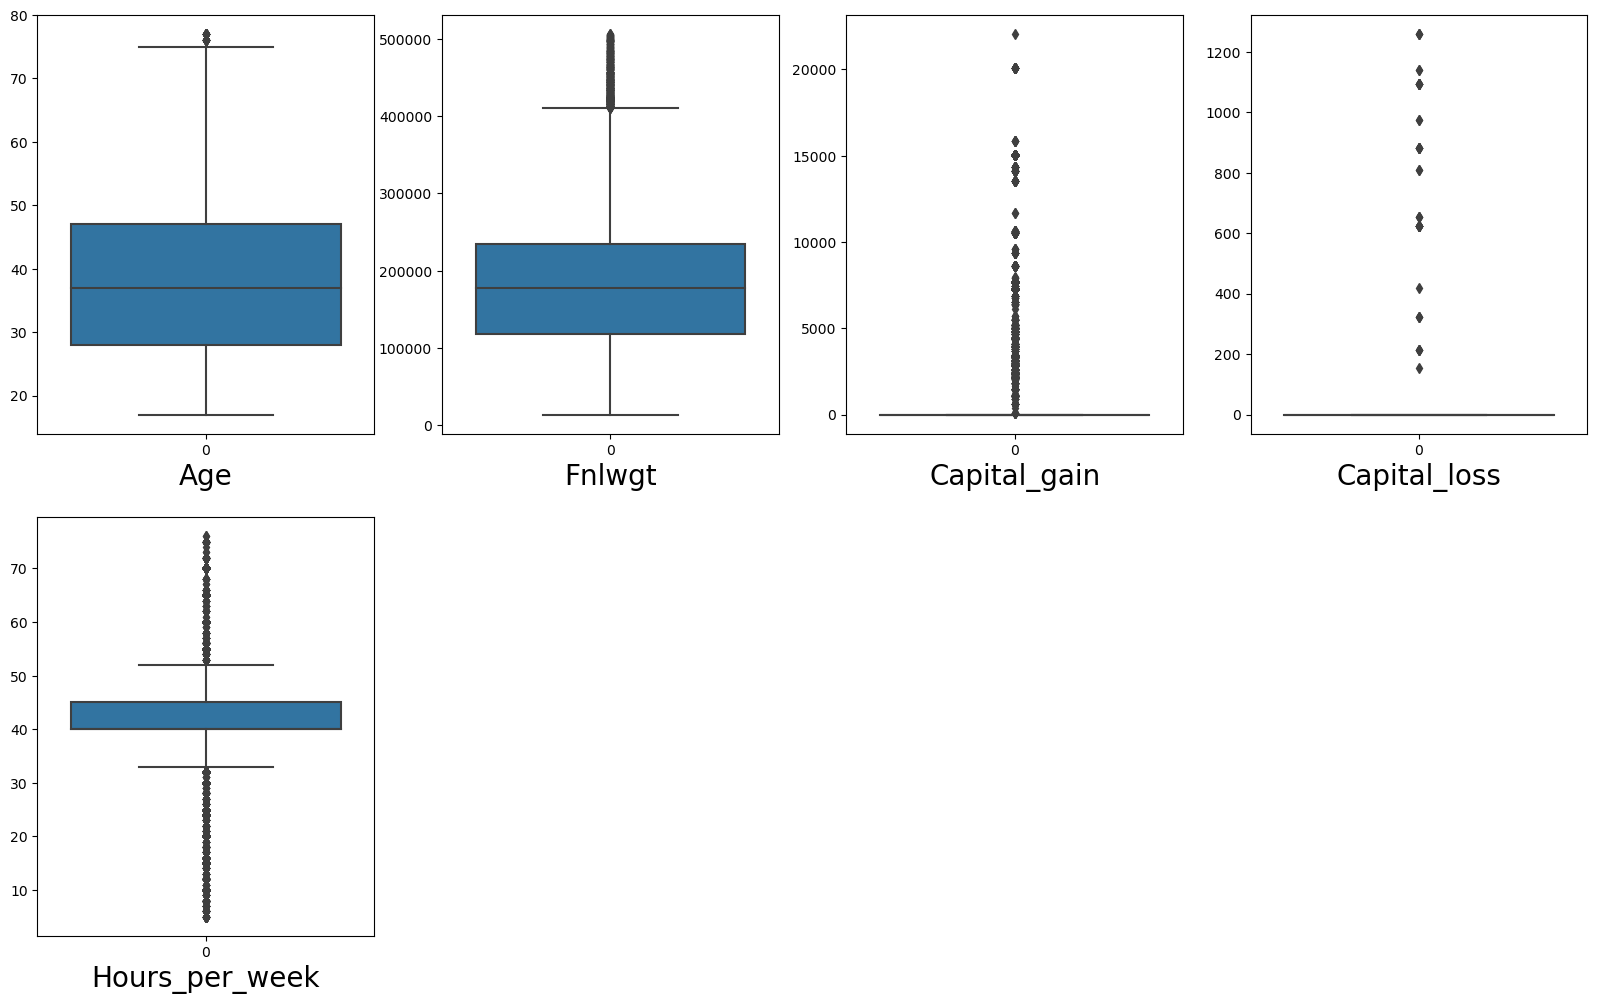

In [111]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


Some outliers have been removed.

In [112]:
X.skew()

Age                0.447864
Fnlwgt             0.630039
Education_num     -0.322370
Capital_gain       4.873194
Capital_loss      29.355524
Hours_per_week    -0.278405
dtype: float64

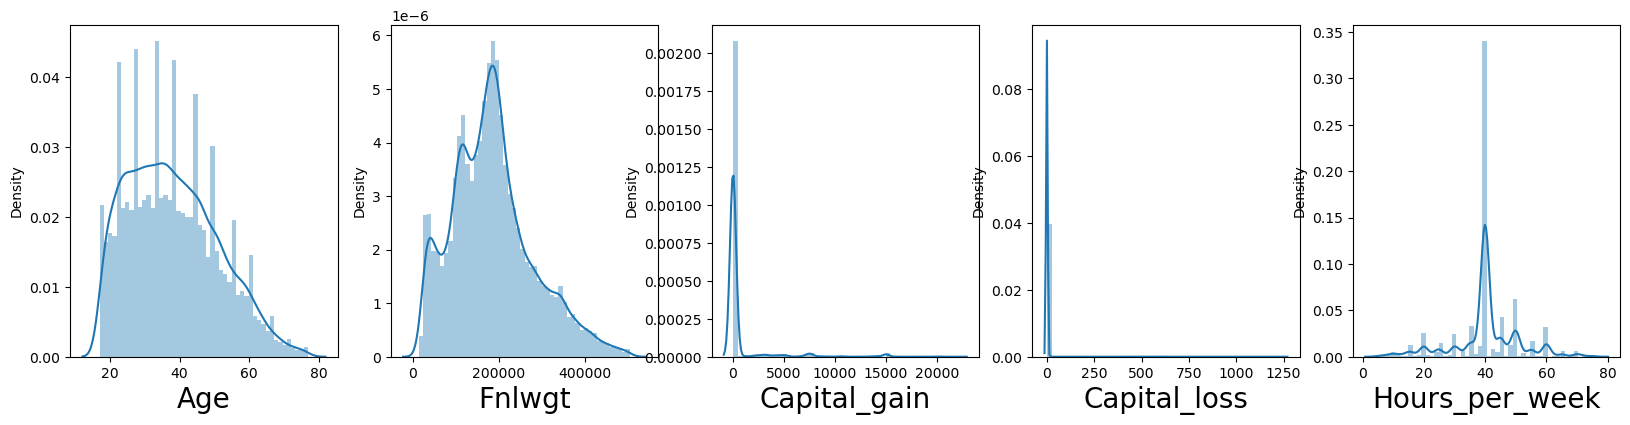

In [113]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Considerable skewness exists in the data distributions.

In [115]:
from sklearn.preprocessing import PowerTransformer

In [116]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [117]:
df4 = X[['Fnlwgt','Capital_gain','Capital_loss']]

In [118]:
transformed= powtrans.fit_transform(df4)

In [119]:
transformed = pd.DataFrame(transformed, columns=df4.columns) 

In [120]:
transformed.skew()

Fnlwgt          -0.034745
Capital_gain     3.065023
Capital_loss    24.739539
dtype: float64

In [121]:
transformed.index = CDF.index

In [122]:
CDF[['Fnlwgt','Capital_gain','Capital_loss']]=transformed[['Fnlwgt','Capital_gain','Capital_loss']]

In [123]:
CDF

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,-1.120230,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.297417,-0.040357,13,United-States,<=50K
1,38,Private,0.421868,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.297417,-0.040357,40,United-States,<=50K
2,53,Private,0.602192,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.297417,-0.040357,40,United-States,<=50K
3,28,Private,1.483805,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.297417,-0.040357,40,Cuba,<=50K
4,37,Private,1.044392,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.297417,-0.040357,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,0.807262,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,-0.297417,-0.040357,38,United-States,<=50K
32556,40,Private,-0.213232,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.297417,-0.040357,40,United-States,>50K
32557,58,Private,-0.240977,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,-0.297417,-0.040357,40,United-States,<=50K
32558,22,Private,0.283315,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,-0.297417,-0.040357,20,United-States,<=50K


Encoding the categorical Feature Columns

Encoding using get_dummies()

In [128]:
dumm = pd.get_dummies(CDF[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']],drop_first = False)

In [126]:
dumm.shape

(28289, 57)

In [127]:
CDF = CDF.join(dumm)

In [129]:
CDF.drop(columns = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex'],axis = 1, inplace = True)

Encoding the 'Native_country' Column using Label encoder

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
labenc = LabelEncoder()

In [132]:
col = ['Native_country']

Encoding the Label Column.


In [135]:
CDF['Income'] = CDF.Income.map({' <=50K':0,' >50K':1}) #'<=50K' = 0 and '>50K' = 1

In [136]:
CDF

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass_ Federal-gov,Workclass_ Local-gov,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,50,-1.120230,13,-0.297417,-0.040357,13,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,0.421868,9,-0.297417,-0.040357,40,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,53,0.602192,7,-0.297417,-0.040357,40,United-States,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,28,1.483805,13,-0.297417,-0.040357,40,Cuba,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,37,1.044392,14,-0.297417,-0.040357,40,United-States,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.807262,12,-0.297417,-0.040357,38,United-States,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32556,40,-0.213232,9,-0.297417,-0.040357,40,United-States,1,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,58,-0.240977,9,-0.297417,-0.040357,40,United-States,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32558,22,0.283315,9,-0.297417,-0.040357,20,United-States,0,0,0,...,1,0,0,0,0,0,0,1,0,1


Finding Correlation

In [137]:
C_corr = CDF.corr()
C_corr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
Age,1.000000,-0.067349,0.035694,0.115543,0.019815,0.119329,0.244073,0.062534,0.071873,-0.207932,...,-0.427948,0.055981,0.027685,-0.009866,-0.011633,-0.010437,-0.032268,0.025574,-0.078207,0.078207
Fnlwgt,-0.067349,1.000000,-0.043976,-0.006192,-0.002969,-0.021939,-0.008234,-0.019830,-0.000841,0.053481,...,0.017868,-0.000839,-0.019614,-0.076166,-0.047925,0.102972,0.014299,-0.044555,-0.025141,0.025141
Education_num,0.035694,-0.043976,1.000000,0.108724,0.007557,0.151815,0.316793,0.060200,0.100146,-0.164742,...,-0.090457,-0.055621,0.028943,-0.028378,0.061778,-0.071851,-0.049392,0.049902,-0.000527,0.000527
Capital_gain,0.115543,-0.006192,0.108724,1.000000,-0.012003,0.077193,0.263477,0.012826,0.013400,-0.042673,...,-0.083511,-0.039138,0.036353,-0.000353,-0.003325,-0.028497,-0.014478,0.029259,-0.065636,0.065636
Capital_loss,0.019815,-0.002969,0.007557,-0.012003,1.000000,-0.001896,-0.017852,0.002846,0.013535,-0.002712,...,-0.012261,0.069770,-0.004693,-0.003991,0.002759,0.001872,0.005944,-0.003357,0.036825,-0.036825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Race_ Black,-0.010437,0.102972,-0.071851,-0.028497,0.001872,-0.060615,-0.088072,0.048534,0.039067,0.004046,...,0.015080,0.151520,0.001096,-0.032059,-0.058492,1.000000,-0.029732,-0.788275,0.119207,-0.119207
Race_ Other,-0.032268,0.014299,-0.049392,-0.014478,0.005944,-0.008793,-0.031571,-0.000819,-0.010833,0.026627,...,-0.005462,0.012335,0.000210,-0.009071,-0.016550,-0.029732,1.000000,-0.223038,0.010567,-0.010567
Race_ White,0.025574,-0.044555,0.049902,0.029259,-0.003357,0.057591,0.084858,-0.051015,-0.026543,-0.004818,...,-0.013359,-0.131242,-0.010651,-0.240488,-0.438777,-0.788275,-0.223038,1.000000,-0.106122,0.106122
Sex_ Female,-0.078207,-0.025141,-0.000527,-0.065636,0.036825,-0.235231,-0.209708,0.001902,0.041843,0.062888,...,0.100161,0.327862,0.311671,0.009359,0.002760,0.119207,0.010567,-0.106122,1.000000,-1.000000


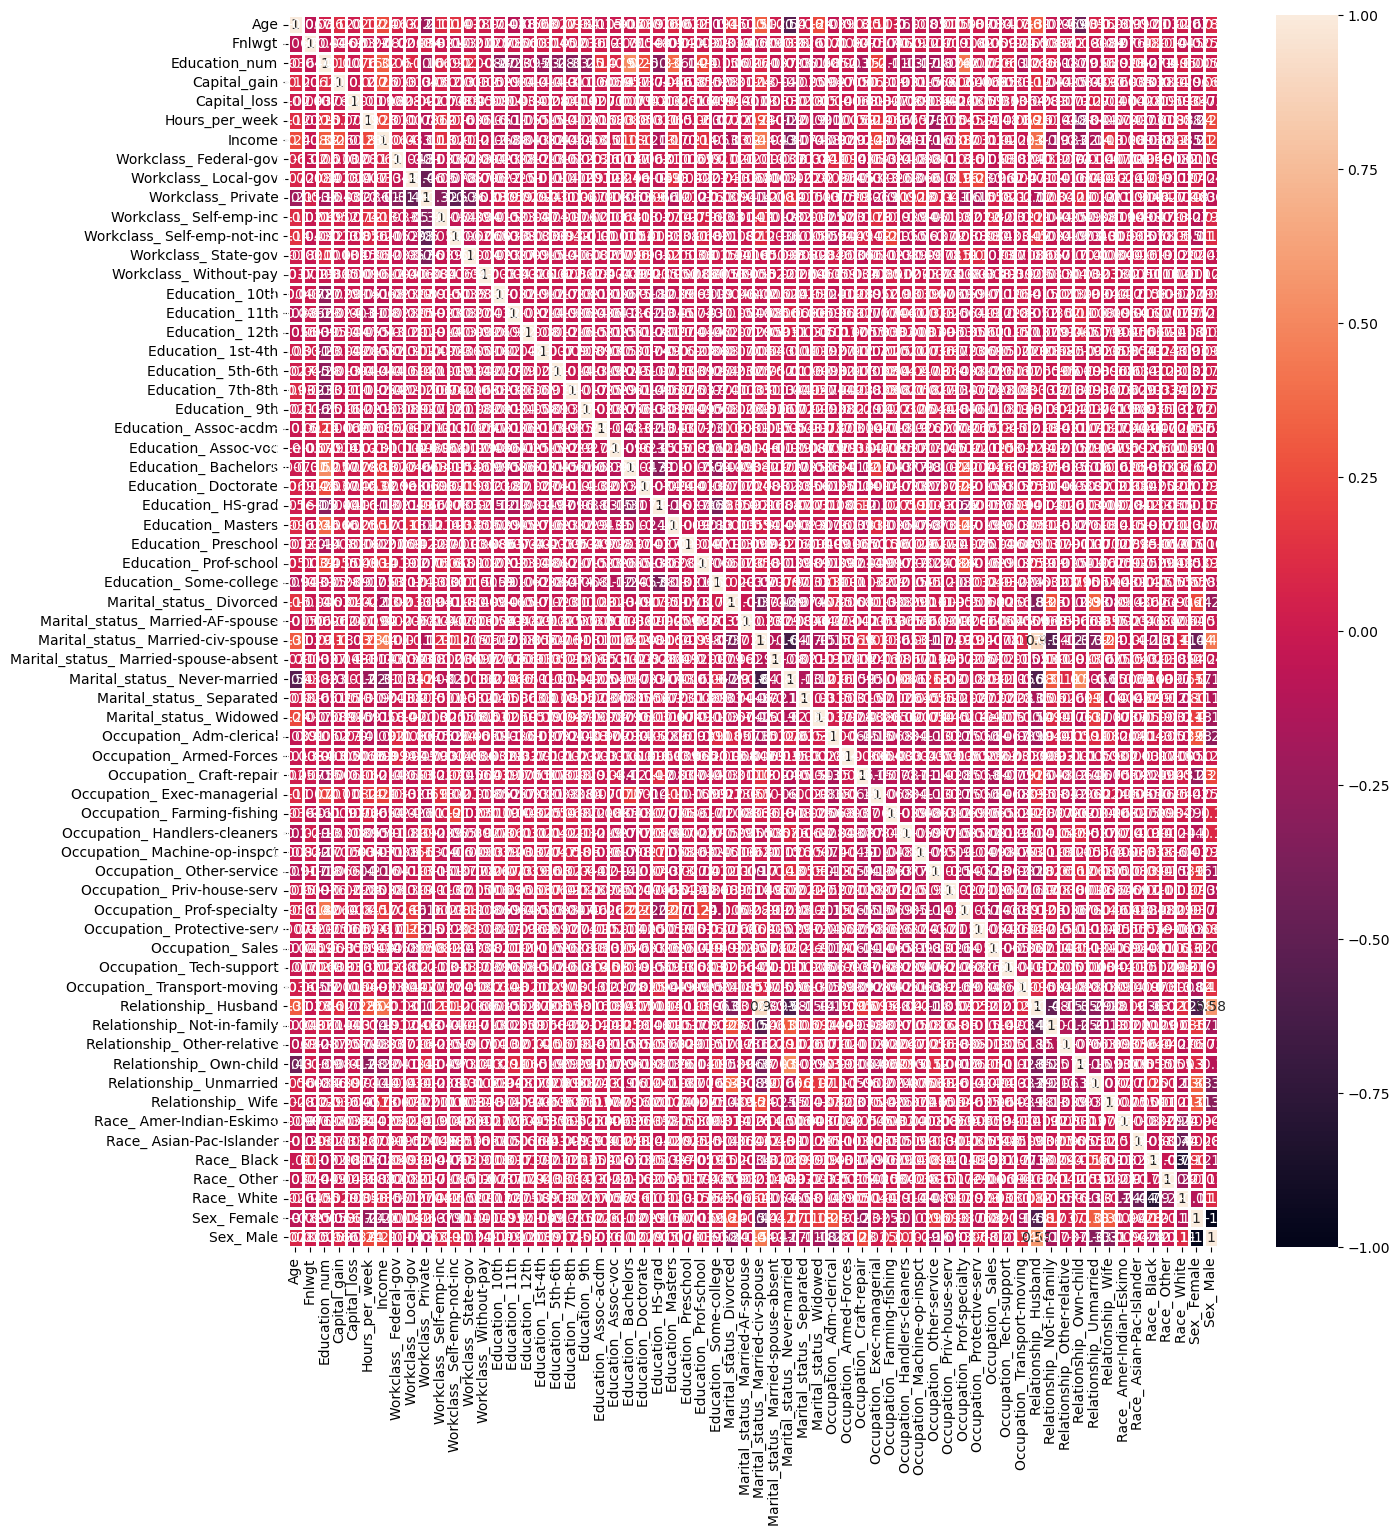

In [139]:
plt.figure(figsize=(15,16))
sns.heatmap(C_corr,annot=True,linewidth=1)
plt.show()

Visualizing correlation of feature columns with label column.

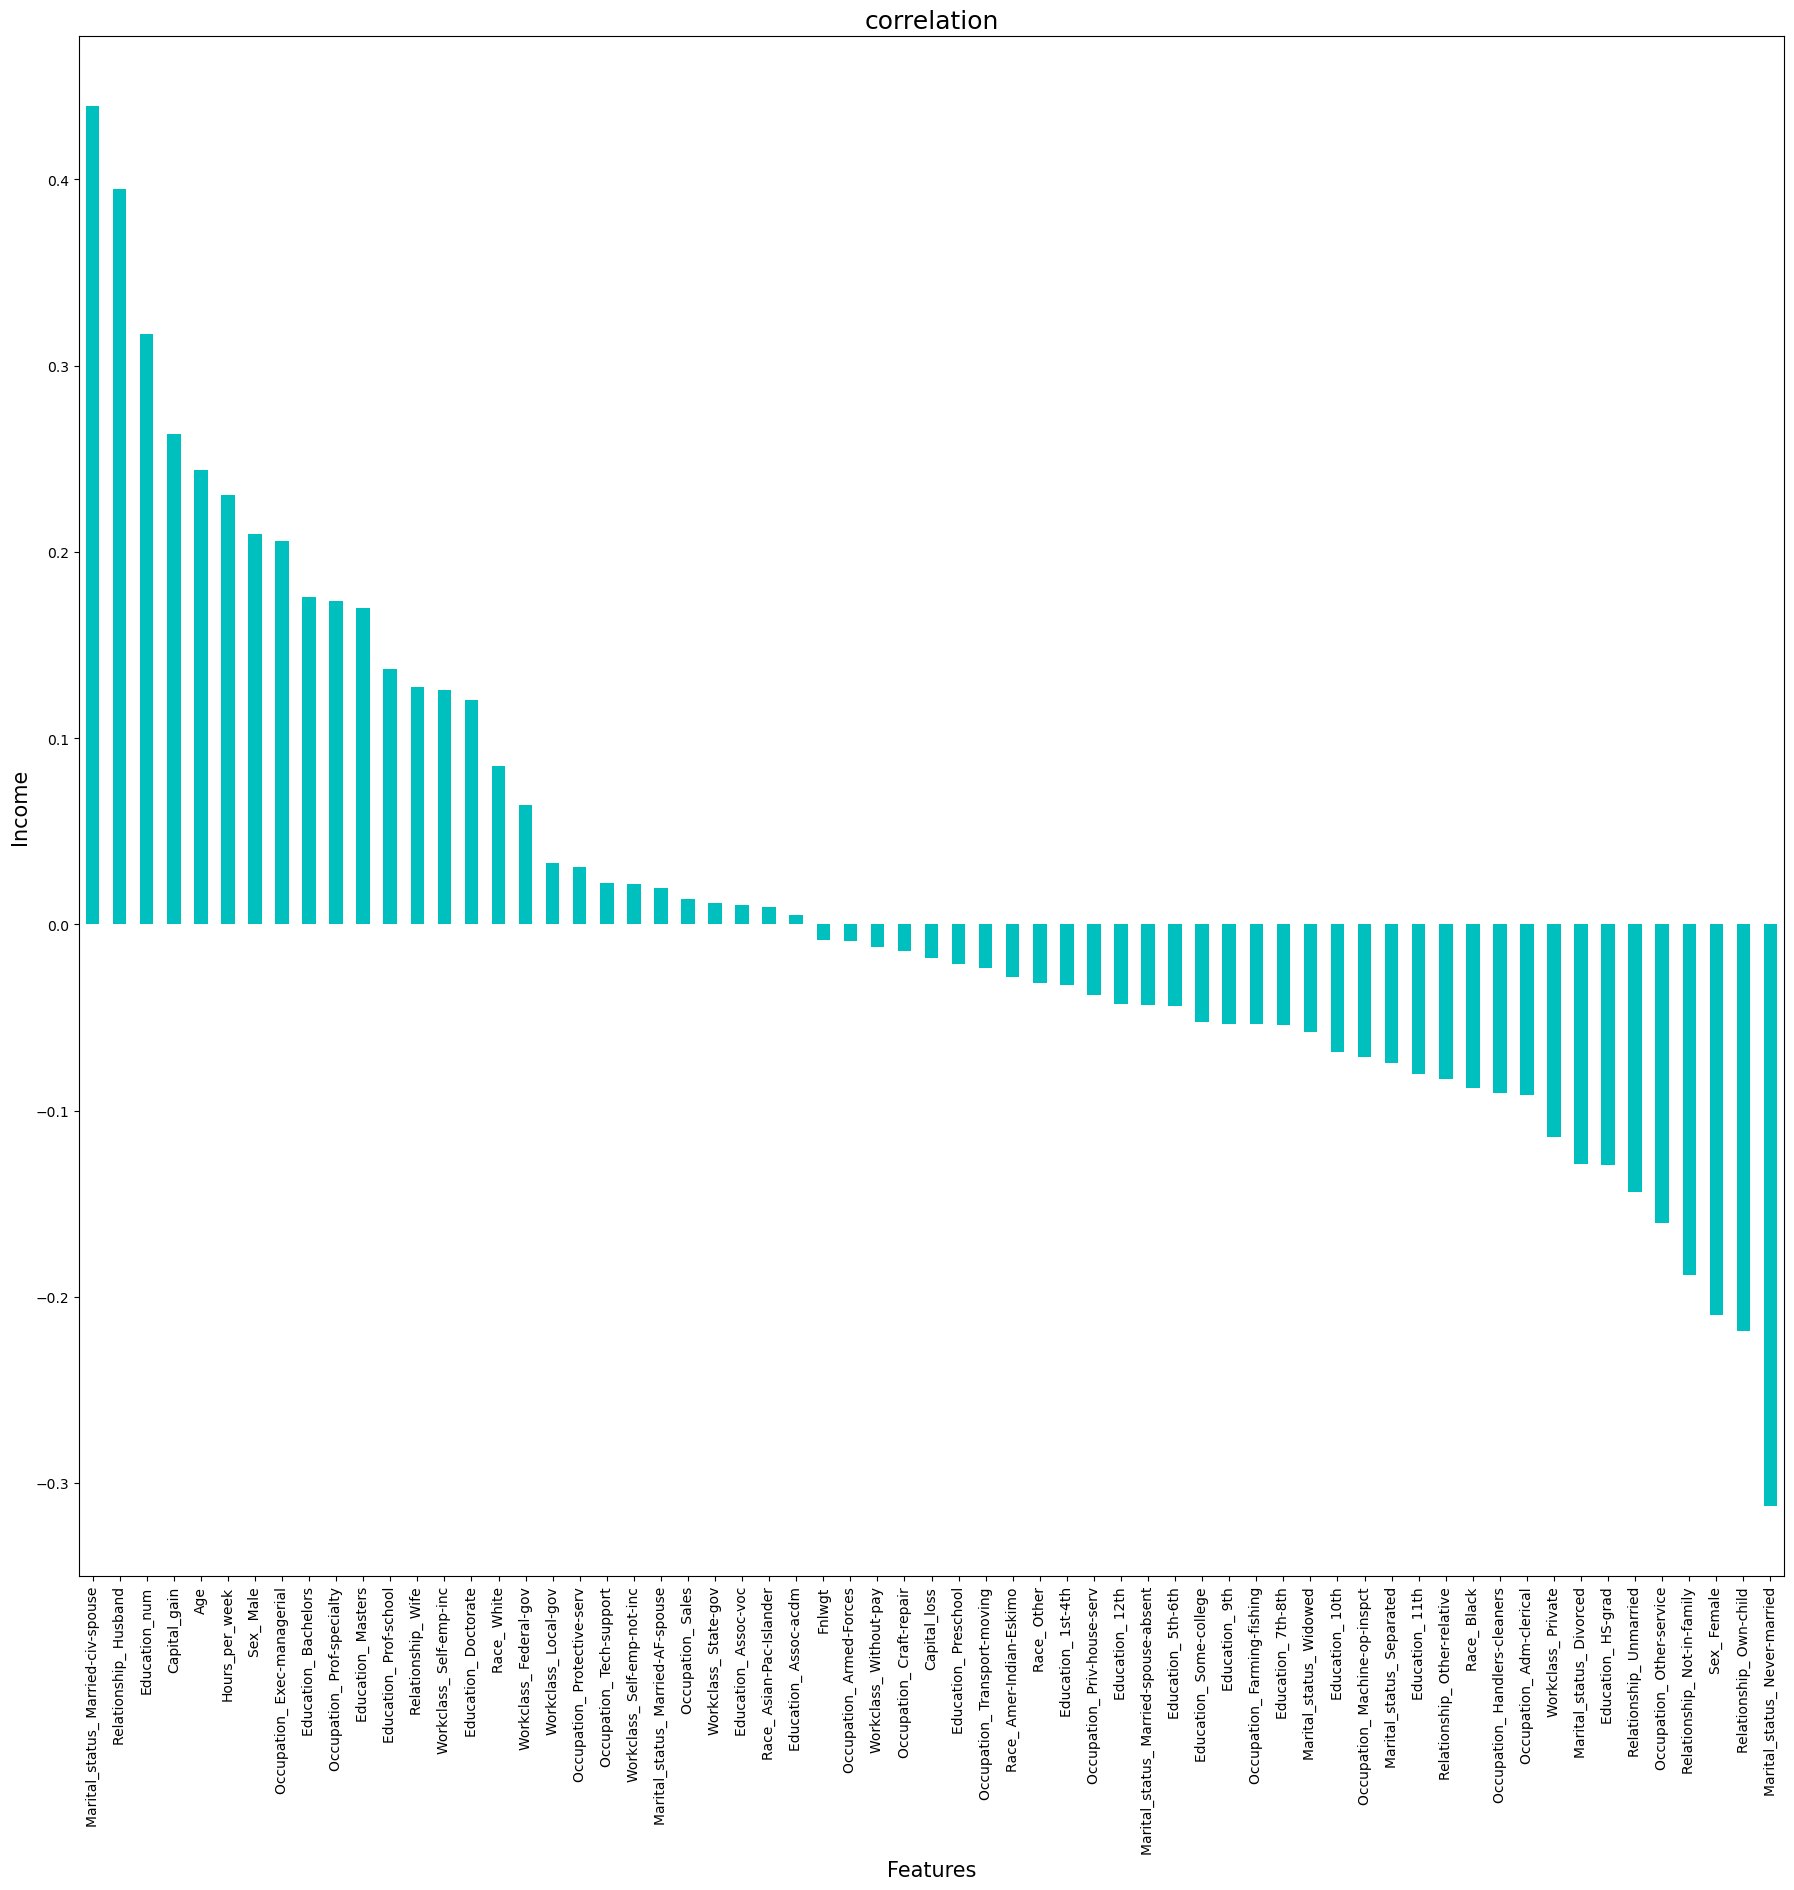

In [140]:
plt.figure(figsize = (22,20))
CDF.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Marital_status Married-civ-spouse,Relationship_Husband,Education_num,Capital_gain,Age,Hours_per_week,Sex_Male,Occupation_Exec-manegerial,Education_Bachelors,Occupation_Prof-speciality,Education_Masters,EducationProf-school,Relationship_Wife,Workclass_Self-emp-inc,Education_Doctorate,Race_white have the highest positive correlation with Income.

while Marital_status_Never-Married,Relationship_Own_child,Sex_Female,Relationship_Not-In-Family,Occupation_Other-service,Relationship_Unmarried,Education_HS-grad,Marital_status_Divorced,Workclas_Private,Occupation_adm-clerical,Race_Black, have the highest negative correlation.

Native_country,Occupation_Tech-support,fnlwgt etc have the lowest correlation with Income

In [141]:
X = CDF.drop(columns = ['Income'])
y = CDF['Income']

This is a Classification problem since Target/ Lable column ('Income') has Categorical type of Data.

Classification Model Building

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [169]:
from imblearn.over_sampling import SMOTE as sm
